In [5]:
from Agent import Agent
import numpy as np

**CASE 1 - 4x4 GRIDWORLD**

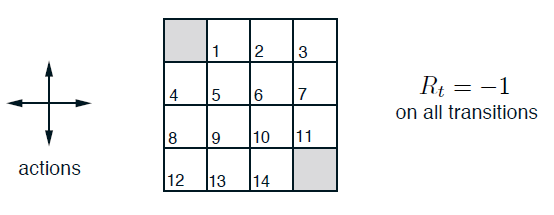

**ENVIRONMENT SETUP**

In [6]:
# Environment states as a list
iStates = [0,  1,  2,  3, 
          4,  5,  6,  7, 
          8,  9,  10, 11, 
          12, 13, 14, 15] # 0 and 15 are the terminal state.
states = []
for i, s in enumerate(iStates):
    states.append(str(s))
terminal_states_idxs = [0, 15]

# Environment actions as a list
actions = ['up', 'right', 'down', 'left']
effects = [-4, 1, 4, -1]

# Environment policy as a [states, actions, 1] 3D matrix. Initialize it as equal
# probability for each action in each state
policy = np.zeros((len(states), len(actions), 1))
policy[:, :] = 0.25
# Set policies for terminal states
policy[0, :] = 0
policy[15, :] = 0

# Environment returns
returns = [0, -1] # same return for each transition (-1) except for the terminal states.

# Environment probabilities of getting return Rt after a transition
s1_r_probs = np.zeros((len(states), len(actions), len(states), len(returns), 1))
for s, _ in enumerate(states):
    if s in set(terminal_states_idxs):
        pass
    else:
        for a, _ in enumerate(actions):
            s1 = iStates[s] + effects[a]
            if a == 0:
                if s1 >= 0 :
                    for r, r_value in enumerate(returns):
                        if s1 != 0 and s1 != 15:
                            s1_r_probs[s, a, s1, 1, :] = 1                    
                        elif s1 == 0 or s1 == 15 :
                            s1_r_probs[s, a, s1, 0, :] = 1
            if a == 1:
                if s1 % 4 != 0:
                    for r, r_value in enumerate(returns):
                        if s1 != 0 and s1 != 15:
                            s1_r_probs[s, a, s1, 1, :] = 1                    
                        elif s1 == 0 or s1 == 15 :
                            s1_r_probs[s, a, s1, 0, :] = 1
            if a == 2:
                if s1 <= 15:
                    for r, r_value in enumerate(returns):
                        if s1 != 0 and s1 != 15:
                            s1_r_probs[s, a, s1, 1, :] = 1                    
                        elif s1 == 0 or s1 == 15 :
                            s1_r_probs[s, a, s1, 0, :] = 1
            if a == 3:
                if s1 % 4 != 3:
                    for r, r_value in enumerate(returns):
                        if s1 != 0 and s1 != 15:
                            s1_r_probs[s, a, s1, 1, :] = 1                    
                        elif s1 == 0 or s1 == 15 :
                            s1_r_probs[s, a, s1, 0, :] = 1

**AGENT DEFINITION**

In [7]:
agent = Agent(s1_r_probs, policy, (states, terminal_states_idxs), actions, returns)

**AGENT TRAINING**

In [8]:
agent.policy_iteration()

Started training iteration No. 0
    State values after policy evaulation are: [ 0.         -2.43474858 -3.08692443 -2.04346222 -2.43474858 -4.65212287
 -4.86952365 -3.08693692 -3.08692443 -4.86952365 -4.65214274 -2.43476992
 -2.04345199 -3.08692443 -2.43476183  0.        ]
Action values after policy improvement are:
Action values for state 0:
{
    Action: up --> Value: 0.0
    Action: right --> Value: 0.0
    Action: down --> Value: 0.0
    Action: left --> Value: 0.0
Action values for state 1:
{
    Action: up --> Value: -9999999.0
    Action: right --> Value: -4.086924433392425
    Action: down --> Value: -5.652122871159955
    Action: left --> Value: 0.0
Action values for state 2:
{
    Action: up --> Value: -9999999.0
    Action: right --> Value: -3.0434622166962124
    Action: down --> Value: -5.8695236522761896
    Action: left --> Value: -3.434748580773303
Action values for state 3:
{
    Action: up --> Value: -9999999.0
    Action: right --> Value: -9999999.0
    Action: down

In [5]:
print(agent.get_actual_policy())

Policy for state 0:
{
    Action: up --> Probability: 0.0
    Action: right --> Probability: 0.0
    Action: down --> Probability: 0.0
    Action: left --> Probability: 0.0
}
Policy for state 1:
{
    Action: up --> Probability: 0.0
    Action: right --> Probability: 0.0
    Action: down --> Probability: 0.0
    Action: left --> Probability: 1.0
}
Policy for state 2:
{
    Action: up --> Probability: 0.0
    Action: right --> Probability: 0.0
    Action: down --> Probability: 0.0
    Action: left --> Probability: 1.0
}
Policy for state 3:
{
    Action: up --> Probability: 0.0
    Action: right --> Probability: 0.0
    Action: down --> Probability: 0.0
    Action: left --> Probability: 1.0
}
Policy for state 4:
{
    Action: up --> Probability: 1.0
    Action: right --> Probability: 0.0
    Action: down --> Probability: 0.0
    Action: left --> Probability: 0.0
}
Policy for state 5:
{
    Action: up --> Probability: 0.5
    Action: right --> Probability: 0.0
    Action: down --> Probabi